In [1]:
#Import dataset da libreria scikit-learn 
from sklearn import datasets
import pandas as pd

#Caricamento dataset
data = pd.read_csv("dataset2.csv ", header = 0)
#data.head()


,"tipologia(FruttaVerdura,Pesce,Carne,Casa,Elettronica)",stagione,"zona supermercato(Periferia,Residenziale)","festività(Feriale,Lavorativo)","scadenza(Breve,Media,Lunga)","dimensione confezione(Piccola,Media,Grande)",costo(prezzo),spedizione(prezzo),fornitura(20-50-100-150-200-300-500)
0,Elettronica,Inverno,Periferia,Lavorativo,Media,Media,200.0,10,50
1,Elettronica,Inverno,Periferia,Lavorativo,Media,Media,100.0,10,200
2,Elettronica,Inverno,Periferia,Lavorativo,Lunga,Media,200.0,10,100
3,Elettronica,Inverno,Periferia,Lavorativo,Media,Piccola,200.0,10,50
4,Elettronica,Inverno,Periferia,Lavorativo,Media,Piccola,10.0,10,100


In [10]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

#Dal mio dataset vado a separare le feature e le classi
y=data["fornitura(20-50-100-150-200-300-500)"]
#converte le stringhe in set di boolean (One-hot encode)
X = pd.get_dummies(data[["tipologia(FruttaVerdura,Pesce,Carne,Casa,Elettronica)","stagione","zona supermercato(Periferia,Residenziale)","festività(Feriale,Lavorativo)","scadenza(Breve,Media,Lunga)","dimensione confezione(Piccola,Media,Grande)","costo(prezzo)","spedizione(prezzo)"]])
#print(X)

# Split dataset nel training set e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training e 30% test
#print(X_test,y_test)

In [11]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Creazione classificatore con alberi dispari
#clf=RandomForestClassifier(n_estimators=99)

#bootstrap=vengono utilizzati sottinsieme di variabili, random_state=sottinsiemi di variabili casuali
clf=RandomForestClassifier(n_estimators=99,bootstrap=True,random_state=0)


#Addestramento
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)
#print(X_test)

#res=clf.predict([[15,15,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1]])
#print(res)

In [12]:
#Import scikit-learn metrics module per il calcolo dell'accuracy
from sklearn import metrics
# Model Accuracy, quanto spesso il classificatore è corretto?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
#print(y_test, y_pred)

Accuracy: 0.7850877192982456


In [13]:
#Series rappresenta dati 1D
#Mostriamo l'importanza delle feature ordinate in ordine decrescente
feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

costo(prezzo)                                                          0.220816
spedizione(prezzo)                                                     0.116879
dimensione confezione(Piccola,Media,Grande)_Piccola                    0.050801
dimensione confezione(Piccola,Media,Grande)_Grande                     0.046016
tipologia(FruttaVerdura,Pesce,Carne,Casa,Elettronica)_FruttaVerdura    0.043987
festività(Feriale,Lavorativo)_Lavorativo                               0.041973
festività(Feriale,Lavorativo)_Feriale                                  0.041154
dimensione confezione(Piccola,Media,Grande)_Media                      0.040504
scadenza(Breve,Media,Lunga)_Breve                                      0.039796
scadenza(Breve,Media,Lunga)_Lunga                                      0.036627
tipologia(FruttaVerdura,Pesce,Carne,Casa,Elettronica)_Elettronica      0.036261
zona supermercato(Periferia,Residenziale)_Periferia                    0.035777
zona supermercato(Periferia,Residenziale

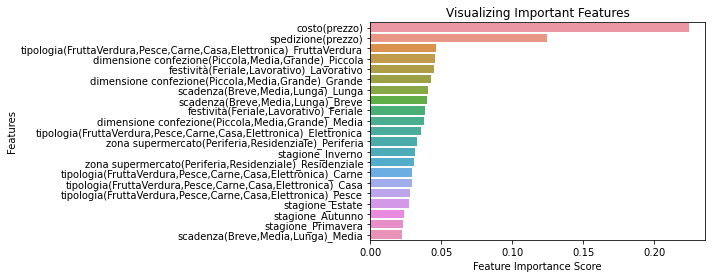

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Creiamo un bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)

# Aggiungiamo le etichette
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
#plt.legend()
plt.show()

In [8]:
#A causa della codifica one hot la visualizzazione non è ottimale
#Aggreghiamo le stesse variabili

feature_imp1=feature_imp.copy()
feature_imp1

feature_imp1["festività"]=feature_imp1["festività(Feriale,Lavorativo)_Lavorativo"]+feature_imp1["festività(Feriale,Lavorativo)_Feriale"]
feature_imp1=feature_imp1.drop(labels=['festività(Feriale,Lavorativo)_Lavorativo','festività(Feriale,Lavorativo)_Feriale'])

feature_imp1["dimensione confezione"]=feature_imp1["dimensione confezione(Piccola,Media,Grande)_Media"]+feature_imp1["dimensione confezione(Piccola,Media,Grande)_Piccola"]+feature_imp1["dimensione confezione(Piccola,Media,Grande)_Grande"]
feature_imp1=feature_imp1.drop(labels=['dimensione confezione(Piccola,Media,Grande)_Media','dimensione confezione(Piccola,Media,Grande)_Piccola','dimensione confezione(Piccola,Media,Grande)_Grande'])

feature_imp1["zona supermercato"]=feature_imp1["zona supermercato(Periferia,Residenziale)_Periferia"]+feature_imp1["zona supermercato(Periferia,Residenziale)_Residenziale"]
feature_imp1=feature_imp1.drop(labels=['zona supermercato(Periferia,Residenziale)_Residenziale','zona supermercato(Periferia,Residenziale)_Periferia'])

feature_imp1["scadenza"]=feature_imp1["scadenza(Breve,Media,Lunga)_Media"]+feature_imp1["scadenza(Breve,Media,Lunga)_Lunga"]+feature_imp1["scadenza(Breve,Media,Lunga)_Breve"]
feature_imp1=feature_imp1.drop(labels=['scadenza(Breve,Media,Lunga)_Media','scadenza(Breve,Media,Lunga)_Lunga','scadenza(Breve,Media,Lunga)_Breve'])

feature_imp1["stagione"]=feature_imp1["stagione_Primavera"]+feature_imp1["stagione_Estate"]+feature_imp1["stagione_Autunno"]+feature_imp1["stagione_Inverno"]
feature_imp1=feature_imp1.drop(labels=['stagione_Inverno','stagione_Estate','stagione_Primavera','stagione_Autunno'])

feature_imp1["tipologia"]=feature_imp1["tipologia(FruttaVerdura,Pesce,Carne,Casa,Elettronica)_Elettronica"]+feature_imp1["tipologia(FruttaVerdura,Pesce,Carne,Casa,Elettronica)_Carne"]+feature_imp1["tipologia(FruttaVerdura,Pesce,Carne,Casa,Elettronica)_Pesce"]+feature_imp1["tipologia(FruttaVerdura,Pesce,Carne,Casa,Elettronica)_FruttaVerdura"]+feature_imp1["tipologia(FruttaVerdura,Pesce,Carne,Casa,Elettronica)_Casa"]
feature_imp1=feature_imp1.drop(labels=['tipologia(FruttaVerdura,Pesce,Carne,Casa,Elettronica)_Elettronica','tipologia(FruttaVerdura,Pesce,Carne,Casa,Elettronica)_Carne','tipologia(FruttaVerdura,Pesce,Carne,Casa,Elettronica)_Pesce','tipologia(FruttaVerdura,Pesce,Carne,Casa,Elettronica)_FruttaVerdura','tipologia(FruttaVerdura,Pesce,Carne,Casa,Elettronica)_Casa'])


feature_imp1.sort_values(ascending=False)

costo(prezzo)            0.224650
tipologia                0.168555
dimensione confezione    0.126317
spedizione(prezzo)       0.124389
stagione                 0.106302
scadenza                 0.102978
festività                0.083243
zona supermercato        0.063566
dtype: float64

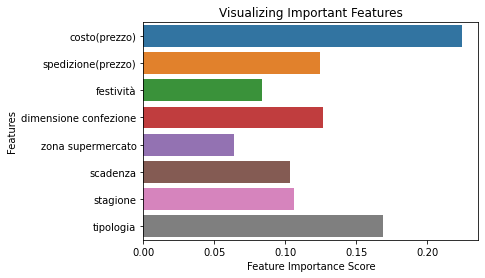

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Ricreiamo il bar plot
sns.barplot(x=feature_imp1, y=feature_imp1.index)


plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
#plt.legend()
plt.show()

In [10]:
# Tools per la visualizzazione
from sklearn.tree import export_graphviz
import pydot

# Prendiamo un albero dalla foresta
tree = clf.estimators_[5]

feature_list=list(X.columns)
# Esportiamo l'immagine
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)

# Usiamo un file dot per salvare l'immagine
(graph, ) = pydot.graph_from_dot_file('tree.dot')

# Trasformiamo in png
graph.write_png('tree.png')

In [11]:
from IPython.display import Image
Image(filename='tree.png') 

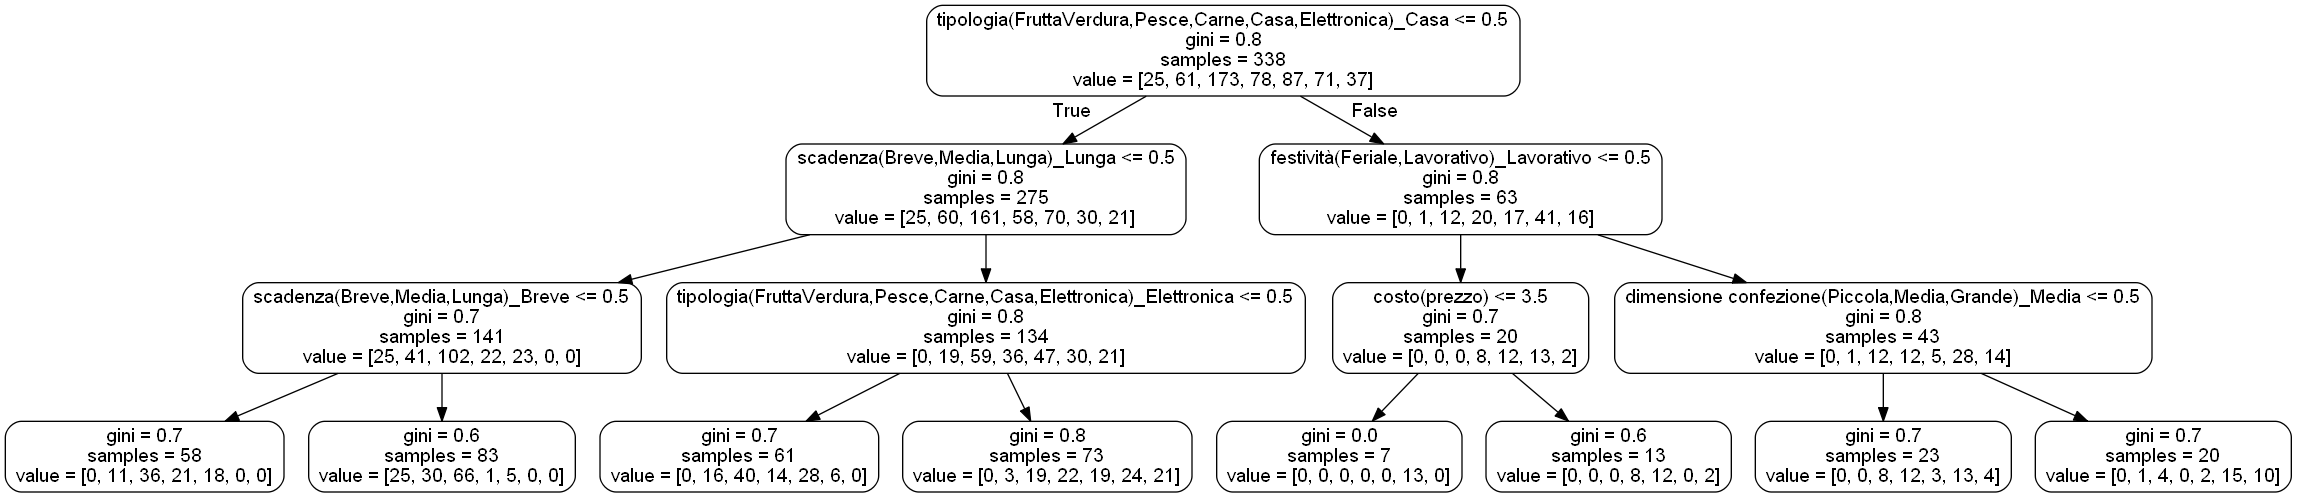

In [12]:
# Limitiamo la profondità al livello 3
rf_small = RandomForestClassifier(n_estimators=10, max_depth = 3)
rf_small.fit(X_train,y_train)

# Estraiamo l'albero ridotto
tree_small = rf_small.estimators_[5]

# Salviamo come png
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

# Mostriamo
Image(filename='small_tree.png')

In [13]:
#Traduciamo in java
from sklearn_porter import Porter
porter = Porter(clf, language='java')
output = porter.export(embed_data=True)
#print(output)
f = open('java1.txt','w')
f.write(output)
f.close()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

